# Tensorflow 2 Object Detection: Train model



<table align="left"><td>
  <a target="_blank"  href="https://colab.research.google.com/github/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/Tensorflow_2_Object_Detection_Train_model.ipynb">
    <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab
  </a>
</td><td>
  <a target="_blank"  href="https://github.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/Tensorflow_2_Object_Detection_Train_model.ipynb">
    <img width=32px src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
</td></table>

This notebook walks you through training a custom object detection model using the Tensorflow Object Detection API and Tensorflow 2.

The notebook is split into the following parts:
* Install the Tensorflow Object Detection API
* Prepare data for use with the OD API
* Write custom training configuration
* Train detector
* Export model inference graph
* Test trained model

![Microcontroller Detection](https://github.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/doc/output.png?raw=1)

## Installation

Installing the Tensorflow Object Detection API became a lot easier with the relase of Tensorflow 2. The following few cells are all that is needed in order to install the OD API.

In [ ]:
!pip install -U --pre tensorflow=="2.5.0"

In [1]:
import os
import pathlib

# Clone the tensorflow models repository if it doesn't already exist
if "models" in pathlib.Path.cwd().parts:
  while "models" in pathlib.Path.cwd().parts:
    os.chdir('..')
elif not pathlib.Path('models').exists():
    # Si no lo tenemos clonamos el repositorio
  !git clone --depth 1 https://github.com/tensorflow/models

Clonando en 'models'...
remote: Enumerating objects: 2815, done.
remote: Counting objects: 100% (2815/2815), done.
remote: Compressing objects: 100% (2350/2350), done.
remote: Total 2815 (delta 724), reused 1331 (delta 430), pack-reused 0
Recibiendo objetos: 100% (2815/2815), 32.80 MiB | 4.59 MiB/s, listo.
Resolviendo deltas: 100% (724/724), listo.
Actualizando archivos: 100% (2587/2587), listo.


In [9]:
# Install the Object Detection API
%%bash
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

SyntaxError: invalid syntax (<ipython-input-9-1cb5b0736a81>, line 3)

In [11]:
#run model builder test
!python models/research/object_detection/builders/model_builder_tf2_test.py

2021-07-30 17:42:55.527619: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-07-30 17:42:55.527647: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Running tests under Python 3.8.3: /home/ncostamagna/anaconda3/bin/python
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2021-07-30 17:42:58.127430: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-07-30 17:42:58.127455: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-07-30 17:42:58.127476: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running

I0730 17:43:06.704134 139857230755648 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b0
I0730 17:43:06.704280 139857230755648 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 64
I0730 17:43:06.704370 139857230755648 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 3
I0730 17:43:06.706731 139857230755648 efficientnet_model.py:147] round_filter input=32 output=32
I0730 17:43:06.723819 139857230755648 efficientnet_model.py:147] round_filter input=32 output=32
I0730 17:43:06.724016 139857230755648 efficientnet_model.py:147] round_filter input=16 output=16
I0730 17:43:06.797300 139857230755648 efficientnet_model.py:147] round_filter input=16 output=16
I0730 17:43:06.797442 139857230755648 efficientnet_model.py:147] round_filter input=24 output=24
I0730 17:43:06.966700 139857230755648 efficientnet_model.py:147] round_filter input=24 output=24
I0730 17:43:06.966843 139

I0730 17:43:10.830222 139857230755648 efficientnet_model.py:147] round_filter input=16 output=16
I0730 17:43:10.830363 139857230755648 efficientnet_model.py:147] round_filter input=24 output=24
I0730 17:43:11.079998 139857230755648 efficientnet_model.py:147] round_filter input=24 output=24
I0730 17:43:11.080147 139857230755648 efficientnet_model.py:147] round_filter input=40 output=48
I0730 17:43:11.376915 139857230755648 efficientnet_model.py:147] round_filter input=40 output=48
I0730 17:43:11.377067 139857230755648 efficientnet_model.py:147] round_filter input=80 output=88
I0730 17:43:11.710023 139857230755648 efficientnet_model.py:147] round_filter input=80 output=88
I0730 17:43:11.710166 139857230755648 efficientnet_model.py:147] round_filter input=112 output=120
I0730 17:43:12.060371 139857230755648 efficientnet_model.py:147] round_filter input=112 output=120
I0730 17:43:12.060598 139857230755648 efficientnet_model.py:147] round_filter input=192 output=208
I0730 17:43:12.517251 13

I0730 17:43:17.782935 139857230755648 efficientnet_model.py:147] round_filter input=112 output=160
I0730 17:43:17.783087 139857230755648 efficientnet_model.py:147] round_filter input=192 output=272
I0730 17:43:18.624210 139857230755648 efficientnet_model.py:147] round_filter input=192 output=272
I0730 17:43:18.624379 139857230755648 efficientnet_model.py:147] round_filter input=320 output=448
I0730 17:43:18.885964 139857230755648 efficientnet_model.py:147] round_filter input=1280 output=1792
I0730 17:43:18.957493 139857230755648 efficientnet_model.py:458] Building model efficientnet with params ModelConfig(width_coefficient=1.4, depth_coefficient=1.8, resolution=380, dropout_rate=0.4, blocks=(BlockConfig(input_filters=32, output_filters=16, kernel_size=3, num_repeat=1, expand_ratio=1, strides=(1, 1), se_ratio=0.25, id_skip=True, fused_conv=False, conv_type='depthwise'), BlockConfig(input_filters=16, output_filters=24, kernel_size=3, num_repeat=2, expand_ratio=6, strides=(2, 2), se_rati

I0730 17:43:28.369744 139857230755648 ssd_efficientnet_bifpn_feature_extractor.py:142] EfficientDet EfficientNet backbone version: efficientnet-b7
I0730 17:43:28.369906 139857230755648 ssd_efficientnet_bifpn_feature_extractor.py:144] EfficientDet BiFPN num filters: 384
I0730 17:43:28.369989 139857230755648 ssd_efficientnet_bifpn_feature_extractor.py:145] EfficientDet BiFPN num iterations: 8
I0730 17:43:28.372487 139857230755648 efficientnet_model.py:147] round_filter input=32 output=64
I0730 17:43:28.393044 139857230755648 efficientnet_model.py:147] round_filter input=32 output=64
I0730 17:43:28.393206 139857230755648 efficientnet_model.py:147] round_filter input=16 output=32
I0730 17:43:28.687766 139857230755648 efficientnet_model.py:147] round_filter input=16 output=32
I0730 17:43:28.687978 139857230755648 efficientnet_model.py:147] round_filter input=24 output=48
I0730 17:43:29.343837 139857230755648 efficientnet_model.py:147] round_filter input=24 output=48
I0730 17:43:29.343989 13

## Prepare data

To train a robust model, you need a lot of pictures that vary greatly from each other. You can either take the pictures yourself or you can download them from the internet.

After collecting the images you need to label them. For this I recommend using [LabelImg](https://github.com/tzutalin/labelImg) - an free, open source graphical image annotation tool.

![LabelImg](https://raw.githubusercontent.com/tzutalin/labelImg/master/demo/demo3.jpg)

After labeling the images, split the data into a training and testing part and convert the xml label files to csv using the [xml_to_csv.py](https://github.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/blob/master/xml_to_csv.py) script.

I uploaded my Microcontroller Detection data-set on Kaggle. The below four cells are used to download and extract the data-set.

In [12]:
# Install Kaggle API
!pip install -q kaggle
!pip install -q kaggle-cli

  ERROR: Command errored out with exit status 1:
   command: /home/ncostamagna/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-fxywdsgr/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-fxywdsgr/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-rcip00by
       cwd: /tmp/pip-install-fxywdsgr/lxml/
  Complete output (176 lines):
  Building lxml version 4.0.0.
  Building without Cython.
  Using build configuration of libxslt 1.1.34
  Building against libxml2/libxslt in the following directory: /home/ncostamagna/anaconda3/lib
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.8
  creating build/lib.linux-x86_64-3.8/lxml
  copying src/lxml/__init__.py -> build/lib.linux-x86_64-3.8/lxml
  copying src/lxml/ElementInclude.py -> 

    ERROR: Command errored out with exit status 1:
     command: /home/ncostamagna/anaconda3/bin/python -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-fxywdsgr/lxml/setup.py'"'"'; __file__='"'"'/tmp/pip-install-fxywdsgr/lxml/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-js0mtnlt/install-record.txt --single-version-externally-managed --compile --install-headers /home/ncostamagna/anaconda3/include/python3.8/lxml
         cwd: /tmp/pip-install-fxywdsgr/lxml/
    Complete output (175 lines):
    Building lxml version 4.0.0.
    Building without Cython.
    Using build configuration of libxslt 1.1.34
    Building against libxml2/libxslt in the following directory: /home/ncostamagna/anaconda3/lib
    running install
    running build
    running build_py
    creating build
    creating build/lib.linux-x

In [ ]:
# only for google colab
import os
os.environ['KAGGLE_USERNAME'] = "<username>" 
os.environ['KAGGLE_KEY'] = "<key>"

In [13]:
!kaggle datasets download -d tannergi/microcontroller-detection --unzip

Traceback (most recent call last):
  File "/home/ncostamagna/anaconda3/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/home/ncostamagna/anaconda3/lib/python3.8/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/home/ncostamagna/anaconda3/lib/python3.8/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /home/ncostamagna/.kaggle. Or use the environment method.


In [ ]:
!mv "Microcontroller Detection" microcontroller-detection

In [14]:
!wget https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/generate_tfrecord.py

--2021-07-30 17:58:54--  https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/generate_tfrecord.py
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 3470 (3,4K) [text/plain]
Guardando como: “generate_tfrecord.py.1”

generate_tfrecord.p 100%[===================>]   3,39K  --.-KB/s    en 0s      

2021-07-30 17:58:54 (12,1 MB/s) - “generate_tfrecord.py.1” guardado [3470/3470]



In [15]:
!wget https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/training/labelmap.pbtxt

--2021-07-30 17:59:00--  https://raw.githubusercontent.com/TannerGilbert/Tensorflow-Object-Detection-API-Train-Model/master/training/labelmap.pbtxt
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 177 [text/plain]
Guardando como: “labelmap.pbtxt”

labelmap.pbtxt      100%[===================>]     177  --.-KB/s    en 0s      

2021-07-30 17:59:01 (11,6 MB/s) - “labelmap.pbtxt” guardado [177/177]



In [1]:
!python generate_tfrecord.py --csv_input=images/train_labels.csv --image_dir=images/train --output_path=train.record
!python generate_tfrecord.py --csv_input=images/test_labels.csv --image_dir=images/test --output_path=test.record

2021-08-02 00:14:53.843796: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-02 00:14:53.843820: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Successfully created the TFRecords: /media/ncostamagna/Costamagna/Cursos/2017-Udemy/Tensorflow/Tensorflow-Object-Detection-API-Train-Model/train.record
2021-08-02 00:15:07.850319: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-02 00:15:07.850344: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
Successfully created the TFRecords: /media/ncostamagna/Costamagna/Cursos

In [12]:
train_record_path = 'train.record'
test_record_path = 'test.record'
labelmap_path = 'training/labelmap.pbtxt'
model_dir = 'training'
pipeline_config_path = 'model_config.config'
output_directory = 'inference_graph'

## Configuring training

Now that the data is ready it's time to create a training configuration. The OD API supports lots of models, each with its own config file. In this notebook I'm making use of EfficientDet, but you can replace it with any model available in the [Tensorflow 2 Detection Model Zoo](https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md).

In [52]:
batch_size = 16
num_steps = 8000
num_eval_steps = 1000

In [20]:
!wget http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
!tar -xf efficientdet_d0_coco17_tpu-32.tar.gz

--2021-08-01 15:28:01--  http://download.tensorflow.org/models/object_detection/tf2/20200711/efficientdet_d0_coco17_tpu-32.tar.gz
Resolviendo download.tensorflow.org (download.tensorflow.org)... 172.217.172.48, 2800:3f0:4002:800::2010
Conectando con download.tensorflow.org (download.tensorflow.org)[172.217.172.48]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 30736482 (29M) [application/x-tar]
Guardando como: “efficientdet_d0_coco17_tpu-32.tar.gz”

efficientdet_d0_coc 100%[===================>]  29,31M  5,77MB/s    en 5,4s    

2021-08-01 15:28:08 (5,41 MB/s) - “efficientdet_d0_coco17_tpu-32.tar.gz” guardado [30736482/30736482]



In [21]:
fine_tune_checkpoint = 'efficientdet_d0_coco17_tpu-32/checkpoint/ckpt-0'

In [22]:
!wget https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config

base_config_path = 'ssd_efficientdet_d0_512x512_coco17_tpu-8.config'

--2021-08-01 15:28:16--  https://raw.githubusercontent.com/tensorflow/models/master/research/object_detection/configs/tf2/ssd_efficientdet_d0_512x512_coco17_tpu-8.config
Resolviendo raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Conectando con raw.githubusercontent.com (raw.githubusercontent.com)[185.199.109.133]:443... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 4630 (4,5K) [text/plain]
Guardando como: “ssd_efficientdet_d0_512x512_coco17_tpu-8.config”

ssd_efficientdet_d0 100%[===================>]   4,52K  --.-KB/s    en 0s      

2021-08-01 15:28:17 (10,8 MB/s) - “ssd_efficientdet_d0_512x512_coco17_tpu-8.config” guardado [4630/4630]



In [23]:
# edit configuration file (from https://colab.research.google.com/drive/1sLqFKVV94wm-lglFq_0kGo2ciM0kecWD)

import re

with open(base_config_path) as f:
    config = f.read()

with open('model_config.config', 'w') as f:
  
  # Set labelmap path
  config = re.sub('label_map_path: ".*?"', 
             'label_map_path: "{}"'.format(labelmap_path), config)
  
  # Set fine_tune_checkpoint path
  config = re.sub('fine_tune_checkpoint: ".*?"',
                  'fine_tune_checkpoint: "{}"'.format(fine_tune_checkpoint), config)
  
  # Set train tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/train)(.*?")', 
                  'input_path: "{}"'.format(train_record_path), config)
  
  # Set test tf-record file path
  config = re.sub('(input_path: ".*?)(PATH_TO_BE_CONFIGURED/val)(.*?")', 
                  'input_path: "{}"'.format(test_record_path), config)
  
  # Set number of classes.
  config = re.sub('num_classes: [0-9]+',
                  'num_classes: {}'.format(4), config)
  
  # Set batch size
  config = re.sub('batch_size: [0-9]+',
                  'batch_size: {}'.format(batch_size), config)
  
  # Set training steps
  config = re.sub('num_steps: [0-9]+',
                  'num_steps: {}'.format(num_steps), config)
  
  # Set fine-tune checkpoint type to detection
  config = re.sub('fine_tune_checkpoint_type: "classification"', 
             'fine_tune_checkpoint_type: "{}"'.format('detection'), config)
  
  f.write(config)

In [24]:
%cat model_config.config

 # SSD with EfficientNet-b0 + BiFPN feature extractor,
# shared box predictor and focal loss (a.k.a EfficientDet-d0).
# See EfficientDet, Tan et al, https://arxiv.org/abs/1911.09070
# See Lin et al, https://arxiv.org/abs/1708.02002
# Trained on COCO, initialized from an EfficientNet-b0 checkpoint.
#
# Train on TPU-8

model {
  ssd {
    inplace_batchnorm_update: true
    freeze_batchnorm: false
    num_classes: 4
    add_background_class: false
    box_coder {
      faster_rcnn_box_coder {
        y_scale: 10.0
        x_scale: 10.0
        height_scale: 5.0
        width_scale: 5.0
      }
    }
    matcher {
      argmax_matcher {
        matched_threshold: 0.5
        unmatched_threshold: 0.5
        ignore_thresholds: false
        negatives_lower_than_unmatched: true
        force_match_for_each_row: true
        use_matmul_gather: true
      }
    }
    similarity_calculator {
      iou_similarity {
      }
    }
    encode_background_as_zeros: true
    anchor_generator {
      m

## Train detector

In [117]:
!python models/research/object_detection/model_main_tf2.py \
    --pipeline_config_path={pipeline_config_path} \
    --model_dir={model_dir} \
    --alsologtostderr \
    --num_train_steps={num_steps} \
    --sample_1_of_n_eval_examples=1 \
    --num_eval_steps={num_eval_steps}


!python models/research/object_detection/model_main_tf2.py --pipeline_config_path=model_config.config --model_dir=training --alsologtostderr

2021-08-01 18:47:32.648522: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-08-01 18:47:32.648546: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2021-08-01 18:47:36.452145: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-08-01 18:47:36.452174: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-08-01 18:47:36.452199: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ncostamagna-E490): /proc/driver/nvidia/version does not exist
2021-08-01 18:47:36.452546: I tensorflow/core/platform/cpu_f

Instructions for updating:
Use `tf.data.Dataset.map()
W0801 18:47:38.803817 140167198279488 deprecation.py:330] From /home/ncostamagna/anaconda3/lib/python3.8/site-packages/object_detection/builders/dataset_builder.py:236: DatasetV1.map_with_legacy_function (from tensorflow.python.data.ops.dataset_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use `tf.data.Dataset.map()
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
W0801 18:47:47.824986 140167198279488 deprecation.py:330] From /home/ncostamagna/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:206: sparse_to_dense (from tensorflow.python.ops.sparse_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Create a `tf.sparse.SparseTensor` and use `tf.sparse.to_dense` instead.
Instructions for updating:
Use `tf.cast` instead.
W0801 18:47:53.614012 140167198279488 deprecation.py:330] From /home/

In [ ]:
%load_ext tensorboard
%tensorboard --logdir 'training/train'

## Export model inference graph

In [ ]:


!python models/research/object_detection/exporter_main_v2.py \
    --trained_checkpoint_dir {model_dir} \
    --output_directory {output_directory} \
    --pipeline_config_path {pipeline_config_path}

python models/research/object_detection/exporter_main_v2.py  --trained_checkpoint_dir training --output_directory inference_graph_1 --pipeline_config_path model_config.config

In [31]:
from google.colab import files
files.download(f'/content/{output_directory}/saved_model/saved_model.pb') 

ModuleNotFoundError: No module named 'google.colab'

## Test trained model on test images

based on [Object Detection API Demo](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/object_detection_tutorial.ipynb) and [Inference from saved model tf2 colab](https://github.com/tensorflow/models/blob/master/research/object_detection/colab_tutorials/inference_from_saved_model_tf2_colab.ipynb).

In [13]:
import io
import os
import scipy.misc
import numpy as np
import six
import time
import glob
from IPython.display import display

from six import BytesIO

import matplotlib
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import tensorflow as tf
from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

%matplotlib inline

In [14]:
def load_image_into_numpy_array(path):
  """Load an image from file into a numpy array.

  Puts image into numpy array to feed into tensorflow graph.
  Note that by convention we put it into a numpy array with shape
  (height, width, channels), where channels=3 for RGB.

  Args:
    path: a file path (this can be local or on colossus)

  Returns:
    uint8 numpy array with shape (img_height, img_width, 3)
  """
  img_data = tf.io.gfile.GFile(path, 'rb').read()
  image = Image.open(BytesIO(img_data))
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)

In [15]:
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
labelmap_path

'training/labelmap.pbtxt'

In [16]:
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'{output_directory}/saved_model')

In [17]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)
  # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
  input_tensor = tf.convert_to_tensor(image)
  # The model expects a batch of images, so add an axis with `tf.newaxis`.
  input_tensor = input_tensor[tf.newaxis,...]

  # Run inference
  model_fn = model.signatures['serving_default']
  output_dict = model_fn(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)
   
  # Handle models with masks:
  if 'detection_masks' in output_dict:
    # Reframe the the bbox mask to the image size.
    detection_masks_reframed = utils_ops.reframe_box_masks_to_image_masks(
              output_dict['detection_masks'], output_dict['detection_boxes'],
               image.shape[0], image.shape[1])      
    detection_masks_reframed = tf.cast(detection_masks_reframed > 0.5,
                                       tf.uint8)
    output_dict['detection_masks_reframed'] = detection_masks_reframed.numpy()
    
  return output_dict

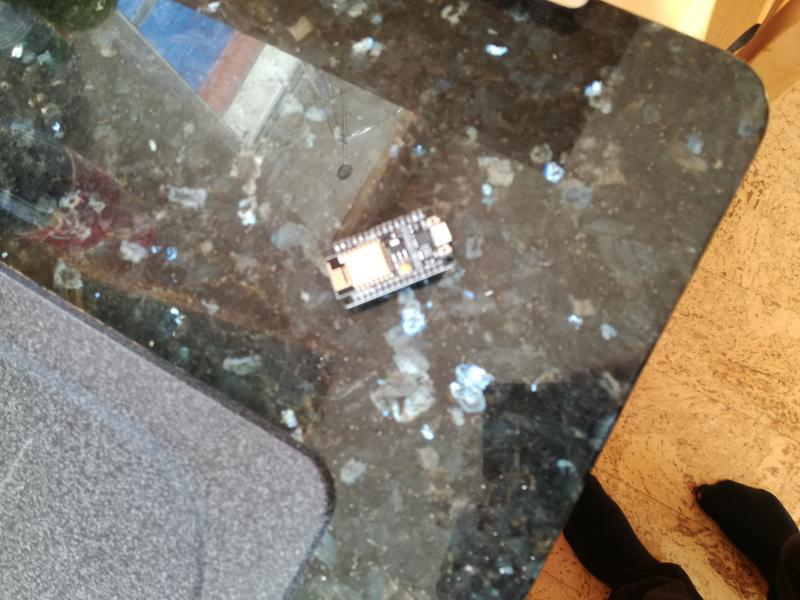

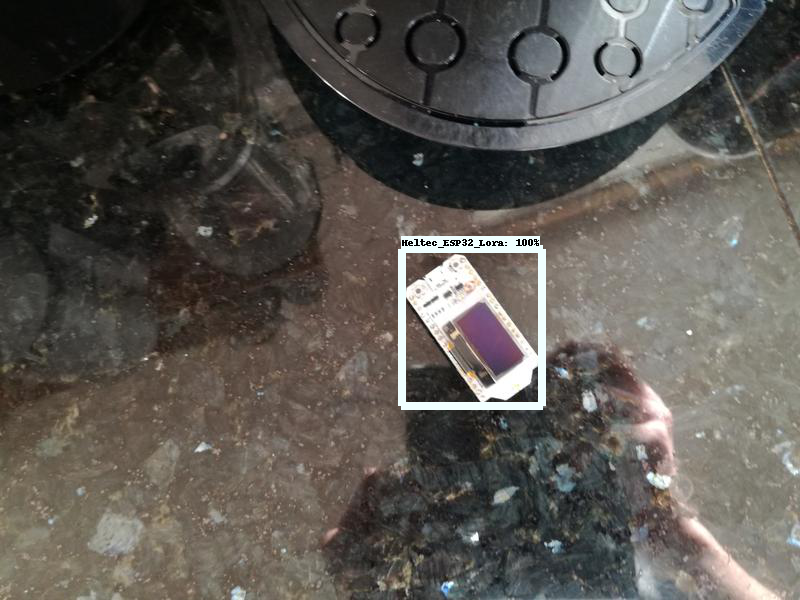

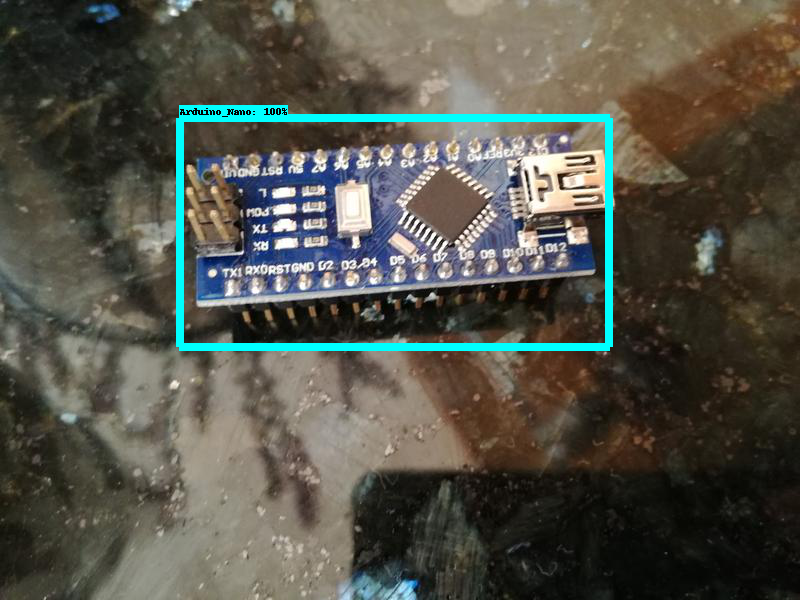

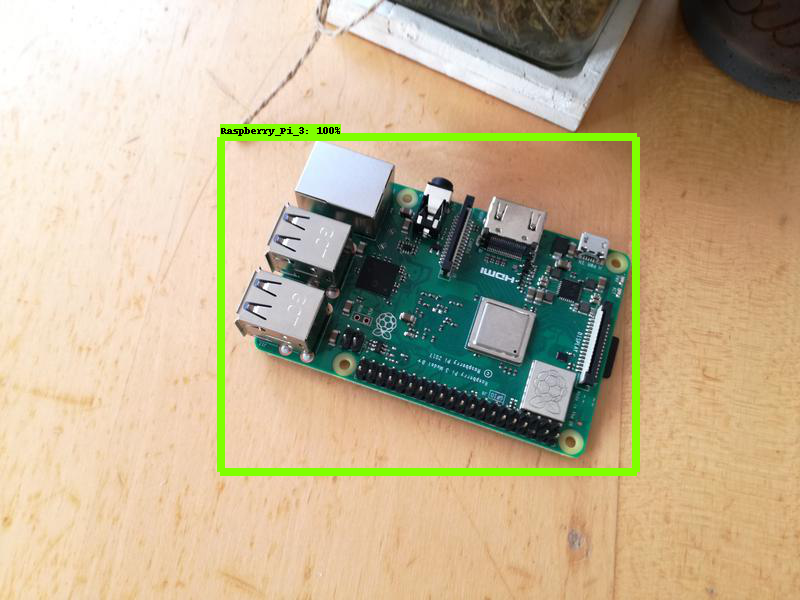

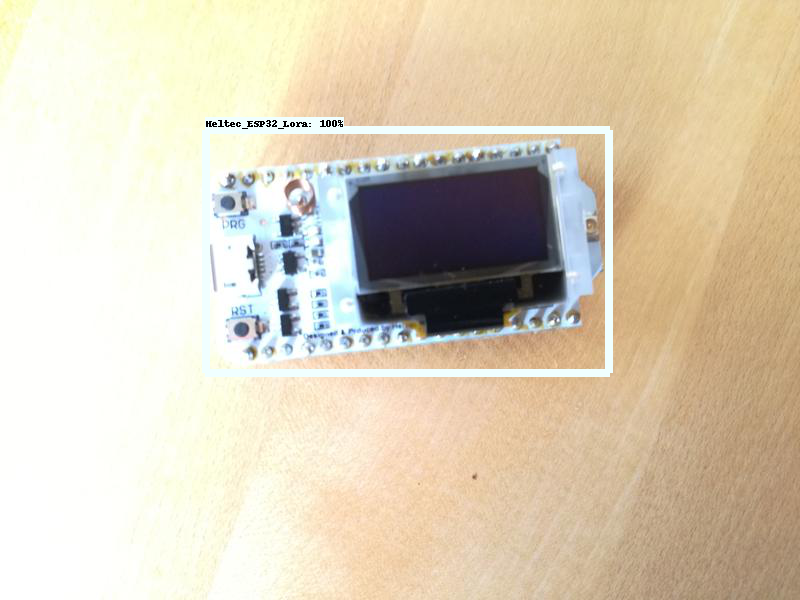

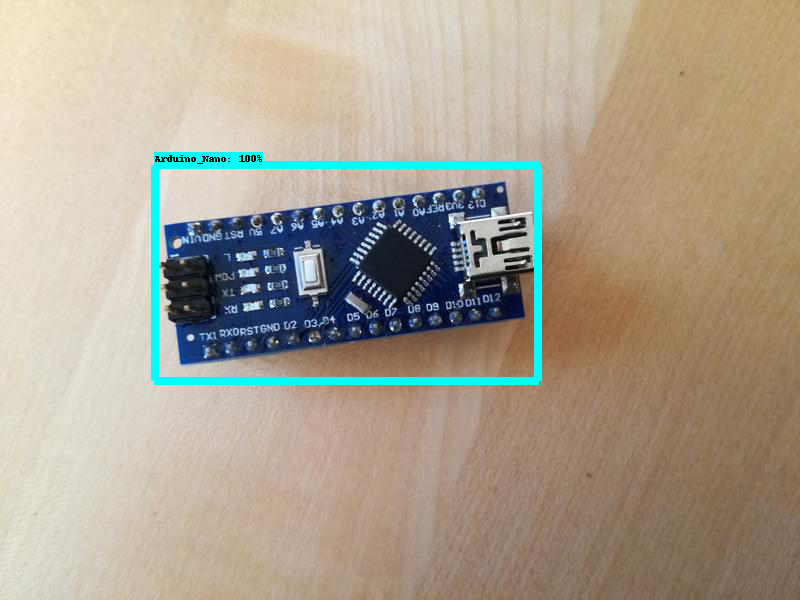

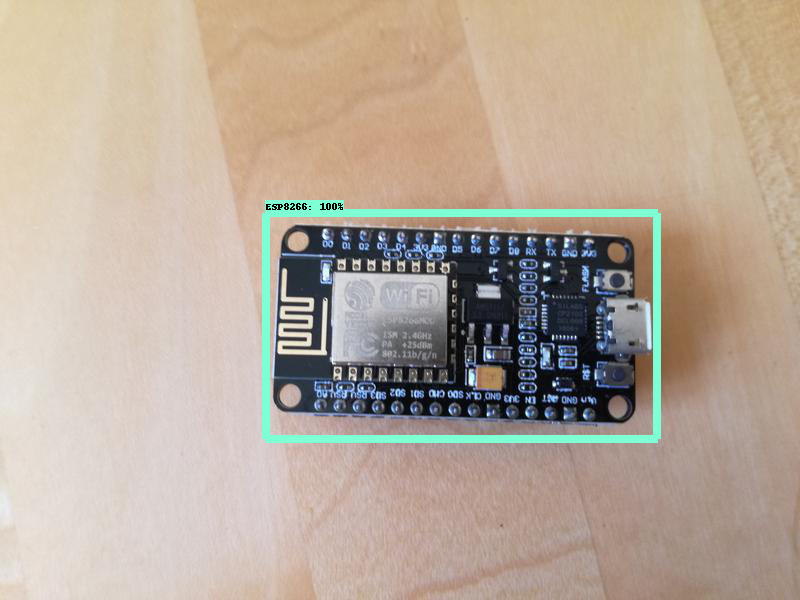

In [18]:
for image_path in glob.glob('images/test/*.jpg'):
  image_np = load_image_into_numpy_array(image_path)
  output_dict = run_inference_for_single_image(model, image_np)
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=output_dict.get('detection_masks_reframed', None),
      use_normalized_coordinates=True,
      line_thickness=8)
  display(Image.fromarray(image_np))